# Visualizations

In this notebook I have gathered the extra visualizations I made in order to better understand my data.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy
from statsmodels.formula.api import ols

# display options
pd.set_option('display.max_columns', None)
sns.set(style='darkgrid')
# sns.set_context('poster')

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(df.shape)
df.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [4]:
# check Datatypes
df_dtype = df.dtypes.reset_index()
df_dtype.columns = ['Count', 'Column Type']
df_dtype

,Count,Column Type
0,Name,object
1,Platform,object
2,Year_of_Release,float64
3,Genre,object
4,Publisher,object
5,NA_Sales,float64
6,EU_Sales,float64
7,JP_Sales,float64
8,Other_Sales,float64
9,Global_Sales,float64


# Data Cleaning

Check NaN values and deal with them, use integers for certain columns, rename columns, check for duplicates

In [5]:
# check NaN values
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
# create df for missing values
# find percentage of NaN values
df_missing = (df.isna().mean().round(4) * 100).reset_index()
df_missing.columns = ['column','percentage']
df_missing = df_missing.sort_values(by = 'percentage')
df_missing

,column,percentage
1,Platform,0.00
5,NA_Sales,0.00
6,EU_Sales,0.00
7,JP_Sales,0.00
8,Other_Sales,0.00
9,Global_Sales,0.00
0,Name,0.01
3,Genre,0.01
4,Publisher,0.32
2,Year_of_Release,1.61


In [7]:
# prepare to plot missing values
df_missing = df.isna().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing = df_missing.sort_values(by='missing_count')

Text(0.5, 1.0, 'Number of NaN values in each column')

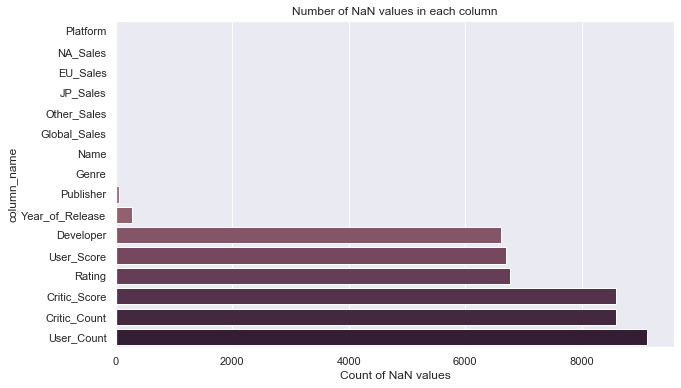

In [8]:
# visualize amount of missing values
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='missing_count', y='column_name', palette='ch:.25', data = df_missing)
ax.set_xlabel('Count of NaN values')
ax.set_title('Number of NaN values in each column')

In [9]:
# create a df cleaned from columns containing more than 50% NaN values
df_missing = (df.isna().sum()/len(df)).reset_index()
df_missing.columns = ['column','proportion']
df_missing = df_missing.sort_values(by = 'proportion')

missingvaluescols = df_missing[df_missing['proportion'] > 0.40].column.tolist()
df_clean = df.drop(missingvaluescols, axis=1)
df_clean.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


In [10]:
# check the difference between the original df and the cleaned df 
print(df.shape)
print(df_clean.shape)

(16719, 16)
(16719, 11)


In [11]:
# use the new cleaned df
df = df_clean
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


In [12]:
# rename columns
# use integer for Year and Global sales columns
df = df.rename(columns={'Year_of_Release': 'Year', 'NA_Sales': 'USA', 'EU_Sales': 'EU', 'JP_Sales': 'JP', 'Other_Sales': 'Other', 'Global_Sales': 'Global'})
df = df[df['Year'].notnull()]
df = df[df['Genre'].notnull()]
df['Year'] = df['Year'].apply(int)
df['Global'] = df['Global'].apply(int)
df.head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,Developer
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31,NaN


In [13]:
# drop 'Developer'
df = df.drop(columns=['Developer'])
df.head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31


In [14]:
# check for duplicates
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [15]:
df = df[df['Year'] <= 2016.0]
# sorted(df.Year.unique())

In [16]:
df.groupby('Genre').sum()

,Year,USA,EU,JP,Other,Global
Genre,,,,,,
Action,6640613,863.17,510.99,160.14,182.22,889
Adventure,2596685,101.52,63.20,52.24,16.37,72
Fighting,1677895,220.51,99.00,87.28,35.87,221
Misc,3454612,399.57,210.60,107.02,73.10,398
Platform,1759387,444.44,199.39,130.71,51.01,572
Puzzle,1140976,121.13,49.78,56.68,12.30,134
Racing,2457964,356.86,234.49,56.63,75.51,415
Role-Playing,2972541,330.04,188.24,353.39,59.41,561
Shooter,2599819,584.83,314.52,38.68,103.33,673


Text(0.5, 1.0, 'Global Unit Sales by Genre')

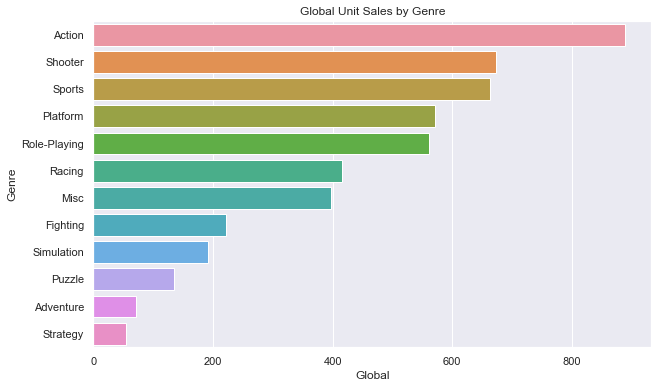

In [17]:
# Sales by Genre
plt.figure(figsize = (10,6))
x = df.groupby('Genre', as_index = False).sum().sort_values(by = 'Global', ascending = False)
sns.barplot(x = 'Global',
            y = 'Genre', data = x, orient = 'h')
plt.title('Global Unit Sales by Genre')
#action games dominate the market

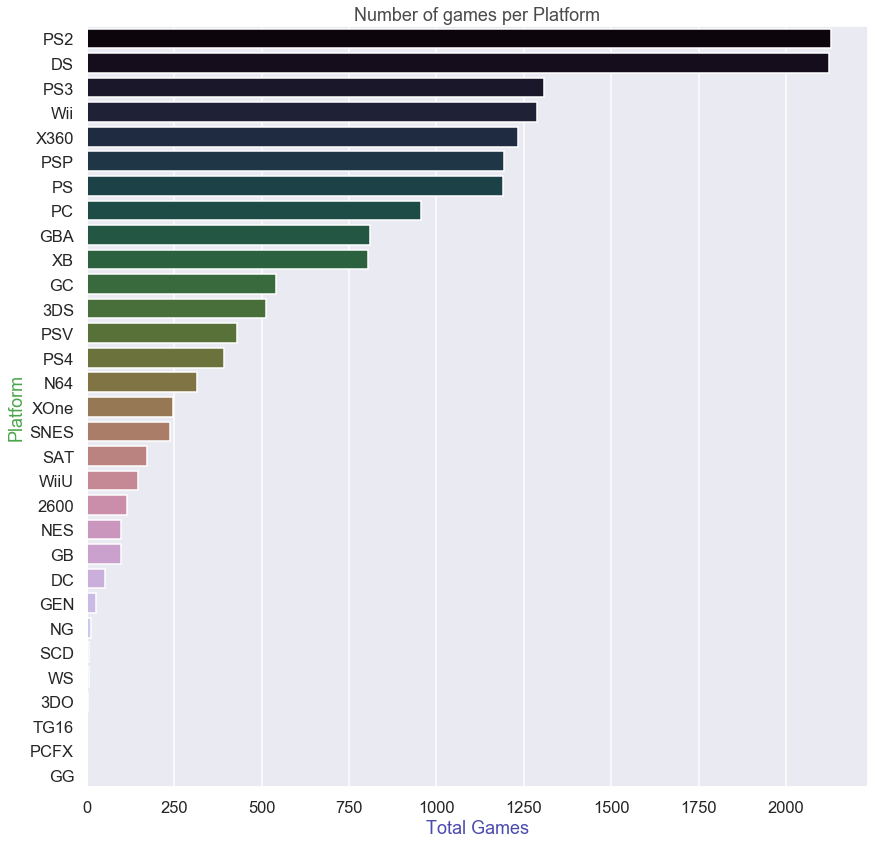

In [18]:
# check number of games/platform
sns.set_context('talk')
platform_name = df.Platform.value_counts()

plt.subplots(figsize=(14,14))
ax = sns.barplot(x=platform_name , y=platform_name .index, palette='cubehelix')
ax.set_title('Number of games per Platform', color='black', alpha=0.7)
ax.set_xlabel('Total Games', color='darkblue', alpha=0.7)
ax.set_ylabel('Platform', color='green', alpha=0.7)

plt.show()

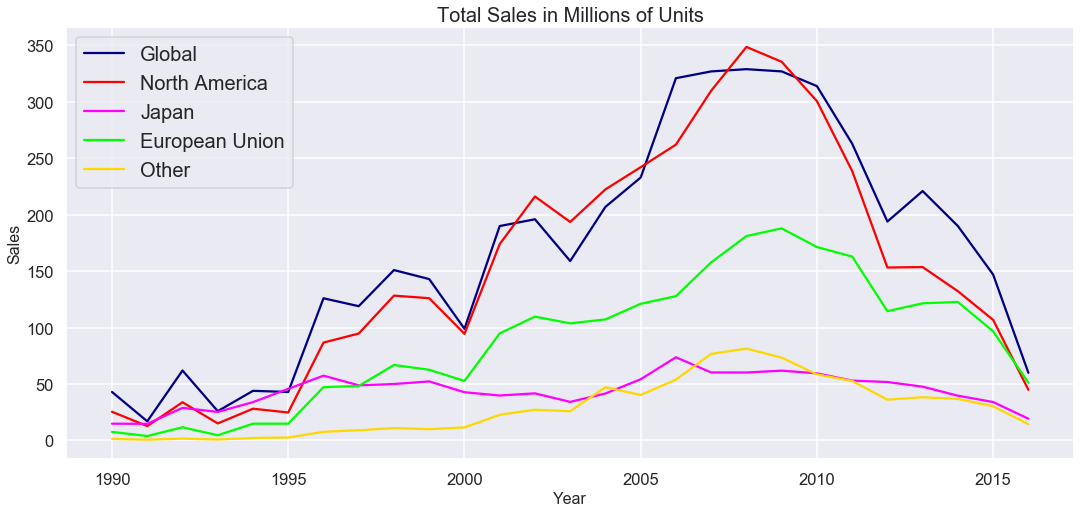

In [20]:
fig = plt.figure(figsize = (14,6))
ax = fig.add_axes([0,0,1,1])
x = df.groupby('Year', as_index = False).sum()
x = x[x['Year'] >= 1990]

sns.lineplot(x = 'Year', y = 'Global', data = x, color = 'navy', label = 'Global', ax = ax)
sns.lineplot(x = 'Year', y = 'USA', data = x, color = 'red', label = 'North America', ax = ax)
sns.lineplot(x = 'Year', y = 'JP', data = x, color = 'magenta', label = 'Japan', ax = ax)
sns.lineplot(x = 'Year', y = 'EU', data = x, color = 'lime', label = 'European Union', ax = ax)
sns.lineplot(x = 'Year', y = 'Other', data = x, color = 'gold', label = 'Other', ax = ax)


ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Sales', fontsize = 16)
ax.tick_params(axis='both', which='major')

#plt.xticks(fontsize = 15, rotation = 90)
ax.set_title('Total Sales in Millions of Units', fontsize = 20)
plt.legend(fontsize = 20)

Text(0.5, 1.0, 'Global Sales by Platform in units of million')

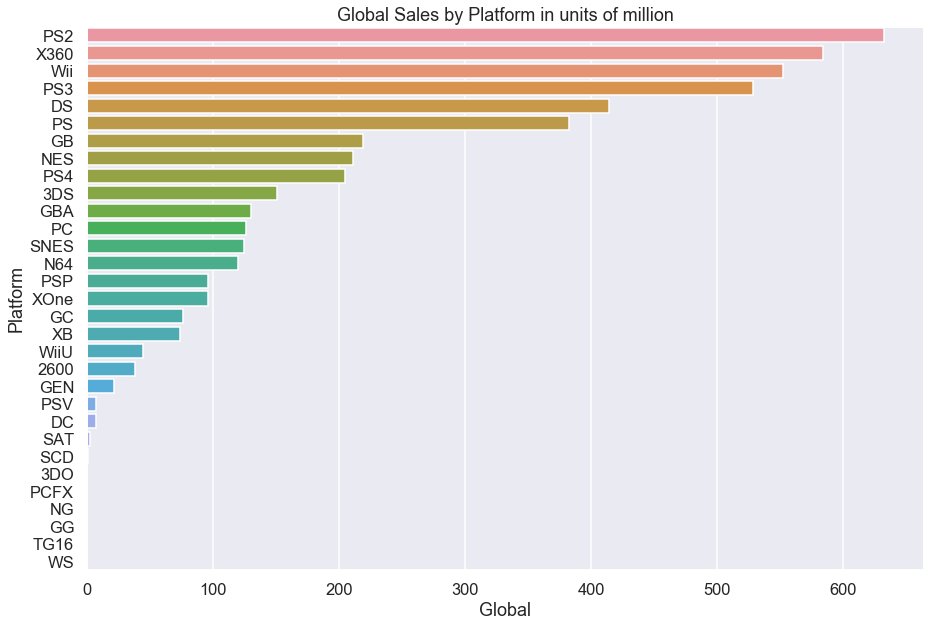

In [21]:
#Platform sales
plt.figure(figsize = (15,10))
x = df.groupby('Platform', as_index = False).sum().sort_values(by = 'Global', ascending = False)
sns.barplot(x = 'Global',
            y = 'Platform', data = x, orient = 'h')
plt.title('Global Sales by Platform in units of million')
#ps2 dominates the market

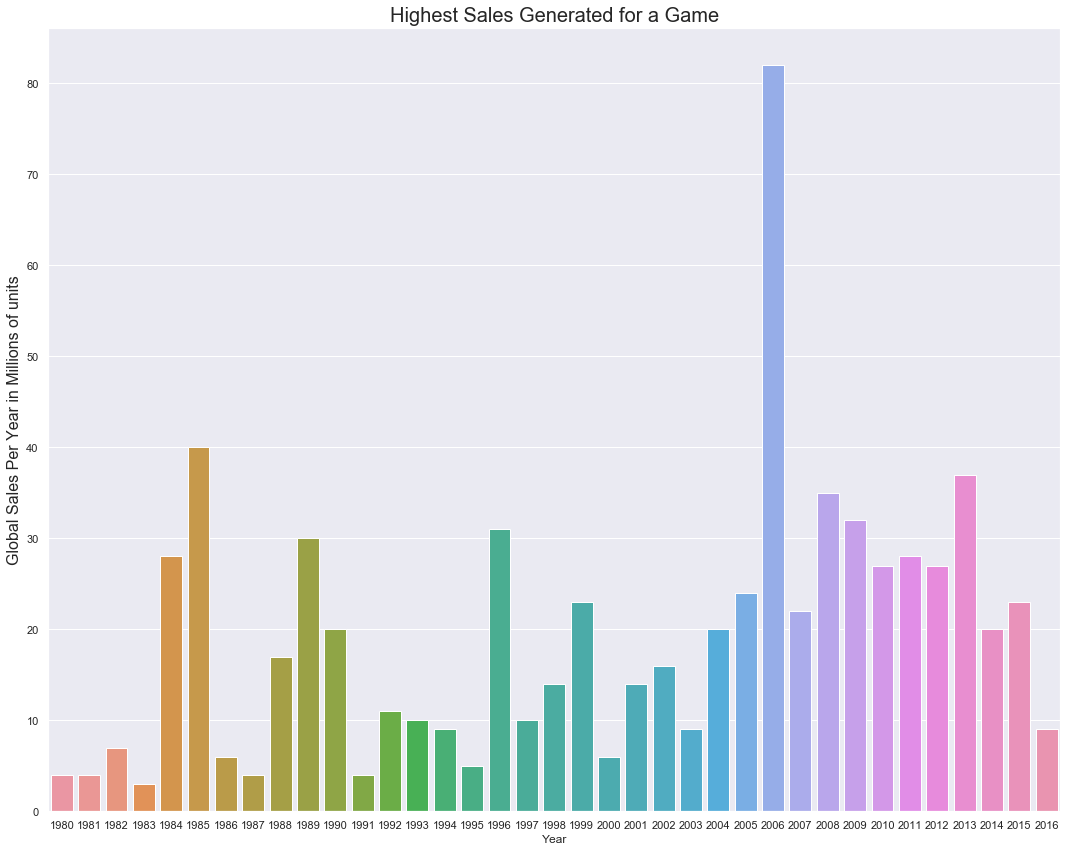

In [22]:
# highest Sales by Game
sns.set_context('notebook')
tbl = df.groupby(['Year','Name'],as_index=False)['Global'].sum().sort_values(by ='Year')
tbl = tbl[tbl['Global'] == tbl.groupby(['Year'])['Global'].transform(max)]
plt.figure(figsize=(15,12))
tbl['Year'] = tbl['Year'].astype(np.int64)

ax = sns.barplot(x = 'Year',y = 'Global', data = tbl)
ax.set_ylabel(ylabel='Global Sales Per Year in Millions of units', fontsize=16)
ax.set_title(label='Highest Sales Generated for a Game', fontsize=20)
plt.tight_layout()

In [25]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [26]:
def platforms(platform):
    if platform in ['PS', 'PS2', 'PS3', 'PS4', "PSP", 'PSV']:
        return 1
    elif platform in ['XB', 'X360', 'XOne']:
        return 2
    elif platform in ['PC']:
        return 3
    elif platform in ['NES', 'SNES', 'N64', 'GB', 'GBA', 'GC', 'DS', 'Wii', 'WiiU']:
        return 4
    else:
        return 5

In [28]:
df['PlatformCategory'] = df.Platform.apply(platforms)

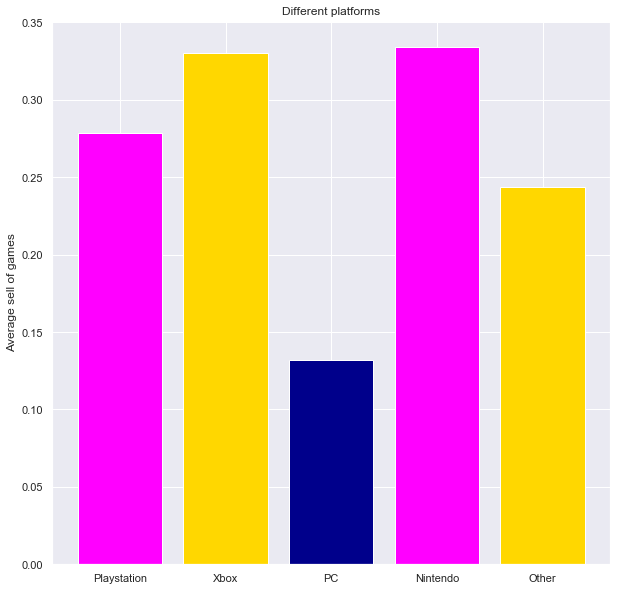

In [30]:
playstation = df['Global'][df['PlatformCategory'] == 1]
xbox = df['Global'][df['PlatformCategory'] == 2]
pc = df['Global'][df['PlatformCategory'] == 3]
nintendo = df['Global'][df['PlatformCategory'] == 4]
other = df['Global'][df['PlatformCategory'] == 5]
x = ['Playstation', 'Xbox', 'PC', 'Nintendo', 'Other']
y = [playstation.mean(), xbox.mean(), pc.mean(), nintendo.mean(), other.mean()]

plt.figure(figsize=(10,10))
plt.bar(x, y, color = ('magenta', 'gold', 'darkblue'))
plt.title('Different platforms')
plt.ylabel('Average sell of games')
plt.show()

In [31]:
df.Genre.value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: Genre, dtype: int64

In [32]:
df[df.Genre == 'Shooter'].head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,PlatformCategory
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28,4
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.04,4.24,0.13,1.32,14,2
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14,1
32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.70,3.68,0.11,1.13,14,2
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.73,0.65,2.42,13,1


In [33]:
df[df.Genre == 'Action'].head()

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,PlatformCategory
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21,1
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20,1
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16,2
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16,1
38,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13,1


In [34]:
df.groupby('Year')['USA'].sum().tail()

Year
2012    153.26
2013    153.65
2014    132.27
2015    106.86
2016     44.93
Name: USA, dtype: float64

In [35]:
df.sort_values('USA', ascending=False)

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,PlatformCategory
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82,4
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40,4
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28,4
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30,4
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35,4
...,...,...,...,...,...,...,...,...,...,...,...
9238,Battlefield: Hardline,PC,2015,Shooter,Electronic Arts,0.00,0.13,0.00,0.01,0,3
12995,Growlanser: Heritage of War (jp sales),PS2,2006,Role-Playing,Rising Star Games,0.00,0.00,0.05,0.00,0,1
9239,Cyber Sled,PS,1995,Action,Sony Computer Entertainment,0.00,0.00,0.13,0.01,0,1
9240,Puyo Puyo!! 20th Anniversary,DS,2011,Puzzle,Sega,0.00,0.00,0.14,0.00,0,4


In [36]:
df.sort_values(['Year','USA'],ascending=[True,False])

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,PlatformCategory
262,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4,5
546,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2,5
1764,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1,5
1968,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1,5
2650,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0,5
...,...,...,...,...,...,...,...,...,...,...,...
16703,The Longest 5 Minutes,PSV,2016,Action,Nippon Ichi Software,0.00,0.00,0.01,0.00,0,1
16707,Strawberry Nauts,PSV,2016,Adventure,Unknown,0.00,0.00,0.01,0.00,0,1
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0,1
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0,1


In [37]:
df[df.Publisher == 'Atari']

,Name,Platform,Year,Genre,Publisher,USA,EU,JP,Other,Global,PlatformCategory
89,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7,5
223,Driver 2,PS,2000,Action,Atari,2.36,2.10,0.02,0.25,4,1
262,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4,5
430,Enter the Matrix,PS2,2003,Action,Atari,1.78,1.12,0.09,0.19,3,1
451,Dragon Ball Z: Budokai,PS2,2002,Fighting,Atari,2.17,0.28,0.55,0.08,3,1
...,...,...,...,...,...,...,...,...,...,...,...
16164,Neverwinter Nights 2: Mask of the Betrayer,PC,2007,Role-Playing,Atari,0.00,0.01,0.00,0.00,0,3
16242,Furious Karting,XB,2003,Racing,Atari,0.01,0.00,0.00,0.00,0,2
16408,Duel Masters: Shadow of the Code,GBA,2004,Misc,Atari,0.01,0.00,0.00,0.00,0,4
16447,Dungeons & Dragons: Neverwinter Nights - Complete,PC,2011,Misc,Atari,0.01,0.00,0.00,0.00,0,3


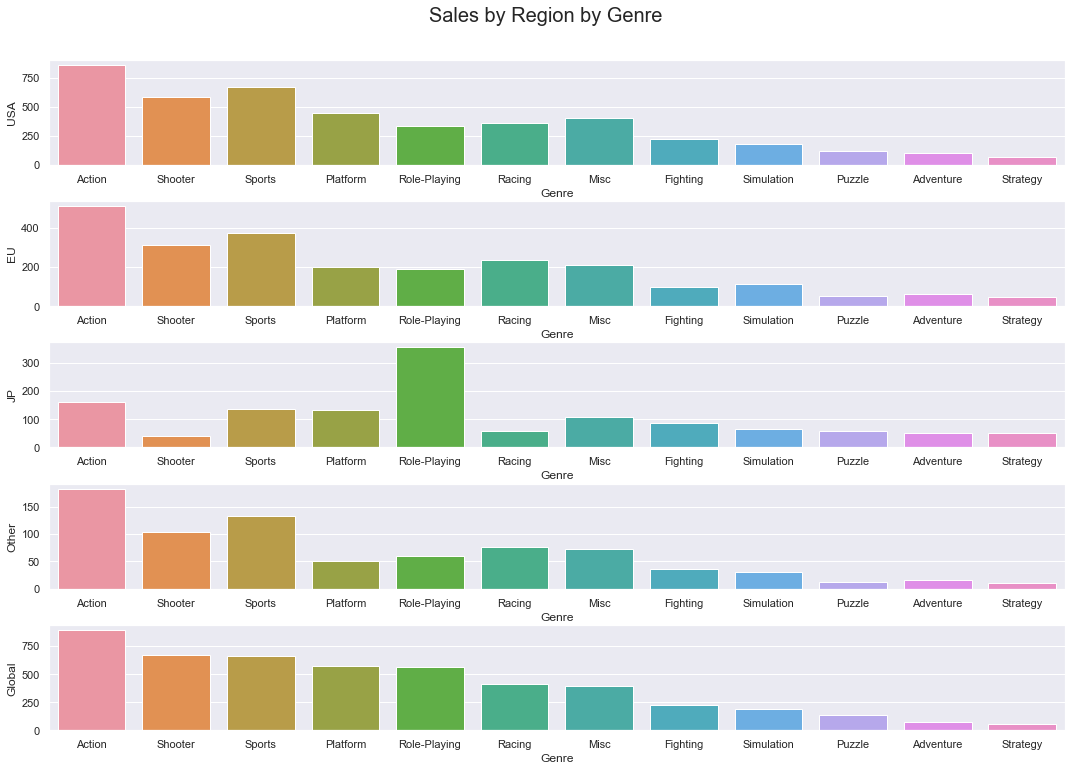

In [38]:
#sales by region by genre
dfplot = df.groupby('Genre', as_index = False).sum().sort_values(by = 'Global', ascending = False)
region = ['USA','EU','JP','Other','Global']

fig, axes = plt.subplots(nrows = len(region), ncols = 1, figsize = (15,10))
plt.tight_layout()
plt.suptitle('Sales by Region by Genre', fontsize = 20, y = 1.05)

for i, r in enumerate(region):
    sns.barplot(y = r , x = 'Genre' , data = dfplot,  orient='v' , ax= axes[i])
    

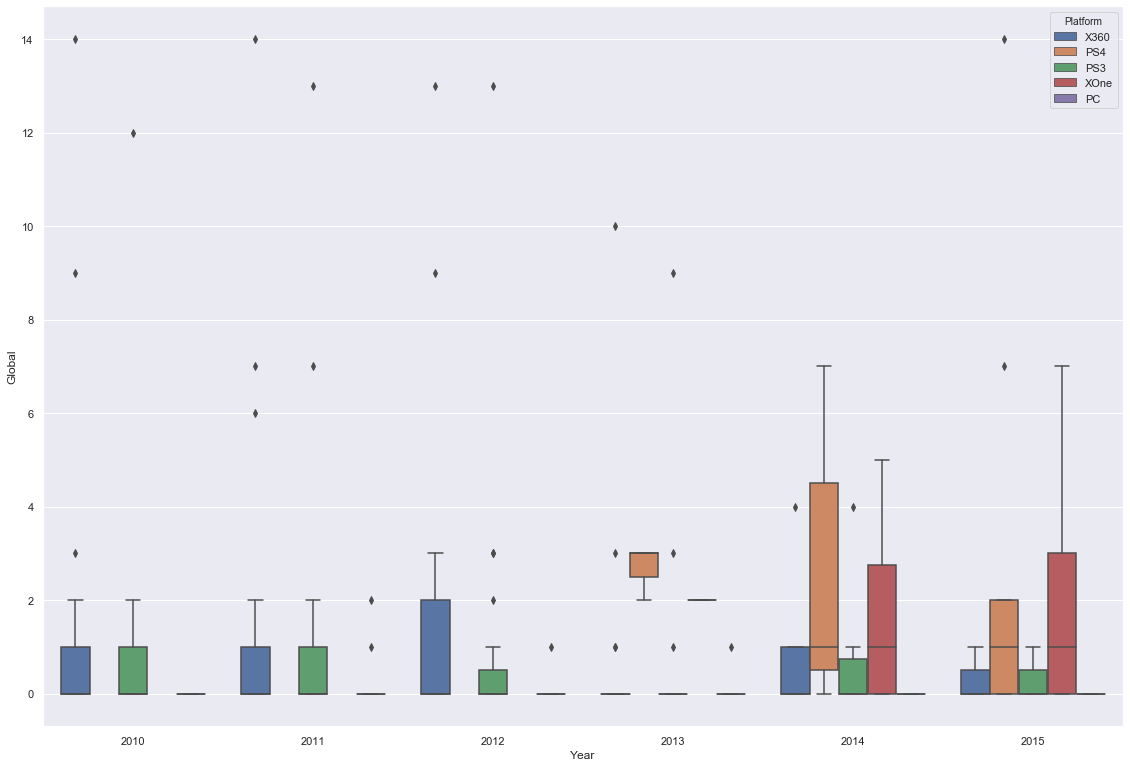

In [39]:
#most popular platformer for shooter
tbl = df[(df['Year'] >= 2010) & (df['Year'] <= 2015)]
platformlist = tbl[(tbl['Genre']) == 'Shooter'].groupby('Platform', as_index = False)[['Platform','Global']].sum().sort_values(by = 'Global'
                                                                                      ,ascending = False).iloc[:5,0]
ax = plt.figure(figsize=(15,10)).add_axes([0,0,1,1])
tbl = tbl[(tbl['Platform'].isin(platformlist)) 
        & (tbl['Genre'] == 'Shooter')]
sns.boxplot(x = 'Year', y = 'Global', data = tbl, hue = 'Platform')